# **Tableau de bord RH(2006-2018)** 

**0 - Importation des bibliothèques pour l'analyse de données et la visualisation**

In [1]:
#importing Libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import plotly.express as px


**1 : Chargement et Exploration Initiale des Données**

In [2]:
#Chemin vers le fichier CSV
file_path = r'C:\Users\abdou\Desktop\BI TB\HR_Power_BI_Dashboard\HRData_py.csv'

#Lecture du fichier CSV
df = pd.read_csv(file_path)

**2 : Analyse des Effectifs du Personnel**

*2-1 : Calcule- Analyse des Effectifs du Personnel*

In [3]:
#Head Count (Nombre total d'employés)
head_count = df['EmployeeID'].count()
#Active Count (Nombre d'employés actifs) & %
active_count = df[df['EmploymentStatus'] == 'Active']['EmployeeID'].count()
percent_active = (active_count / head_count) * 100 if head_count > 0 else 0

#Terminated Count (Nombre d'employés actifs) & %
Terminated_count = df[df['EmploymentStatus'].isin(['Voluntarily Terminated', 'Terminated for Cause'])]['EmployeeID'].count()
percent_Terminated = (Terminated_count / head_count) * 100 if head_count > 0 else 0

## Calculer l'ancienneté en mois-------------------------
#  Convertir les dates au format datetime
df['HiringDate'] = pd.to_datetime(df['HiringDate'], errors='coerce')
df['TerminationDate'] = pd.to_datetime(df['TerminationDate'], errors='coerce')
# Fonction pour calculer l'ancienneté en mois
def calculate_tenure(row):
    if pd.notnull(row['TerminationDate']):  # Vérifier si la date de fin existe
        return (row['TerminationDate'] - row['HiringDate']).days // 30.63  # Convertir jours en mois (moyenne des jours par mois)
    return None  # Ignorer si pas de date de fin pour les Actifs

# Appliquer la fonction et créer la colonne "Tenure_Months"
terminated_employees = df[df['EmploymentStatus'].isin(['Voluntarily Terminated', 'Terminated for Cause'])].copy()
terminated_employees['Tenure_Months'] = terminated_employees.apply(calculate_tenure, axis=1)
# Calculer la moyenne de l'ancienneté des employés terminés
average_tenure = terminated_employees['Tenure_Months'].mean()

#Male Count (Nombre d'employés actifs) & % -------------------
Male_count = df[df['Gender'] == 'M ']['EmployeeID'].count()
Percent_Male = (Male_count/head_count)*100 if head_count > 0 else 0
#Female Count (Nombre d'employés actifs) & %
Female_count = df[df['Gender'] == 'F']['EmployeeID'].count()
Percent_Female = (Female_count/head_count)*100 if head_count > 0 else 0
#Affichage des résultats
print("===========================")
print("Tableau 1 : Répartition par Genre et Statut")
print("--------------------------------")
print(f"Effectif total: {head_count}")
print(f"Employés actifs: {active_count} ({percent_active:.2f}%)")
print(f"Employés Départs: {Terminated_count} ({percent_Terminated:.2f}%)")
print(f"Hommes: {Male_count} ({Percent_Male:.2f}%)")
print(f"Femmes: {Female_count} ({Percent_Female:.2f}%)")
print("===========================")
print(f"La moyenne de l'ancienneté des employés terminés (en mois) est : {average_tenure:.2f} mois")
print("===========================")

Tableau 1 : Répartition par Genre et Statut
--------------------------------
Effectif total: 311
Employés actifs: 207 (66.56%)
Employés Départs: 104 (33.44%)
Hommes: 135 (43.41%)
Femmes: 176 (56.59%)
La moyenne de l'ancienneté des employés terminés (en mois) est : 40.76 mois


**Analyse :**
- *Une grande majorité des employés (66,56%) est encore active, avec une légère prédominance féminine (56,59%). Cela suggère une bonne dynamique d'engagement et une possible culture d'inclusion au sein de l'entreprise.*
- *L'ancienneté moyenne des employés terminés est de 40,76 mois (environ 3 ans et 4 mois). Cela indique que les départs surviennent généralement après une certaine période d'intégration, ce qui peut permettre d'identifier des facteurs spécifiques liés à la rétention des talents.*

*2-2 : Représentation Graphique - Analyse des Effectifs du Personnel*

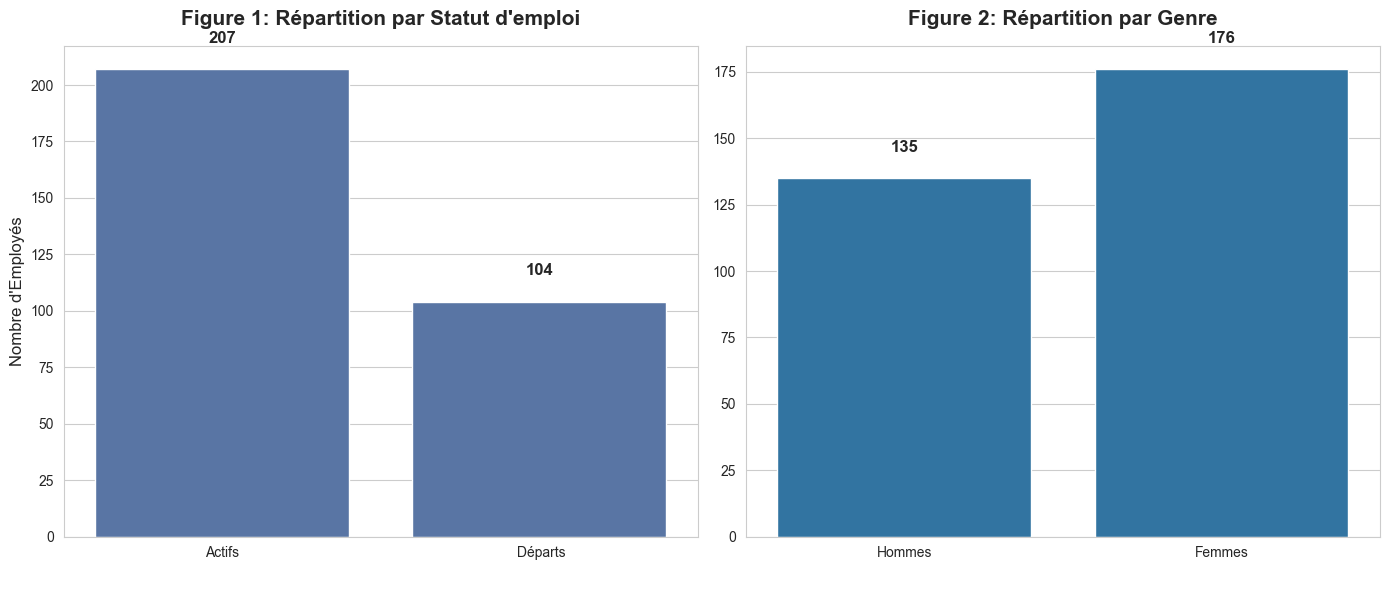

In [4]:
# Configuration initiale
sns.set_style("whitegrid")
plt.figure(figsize=(14, 6))

# Création d'une grille 1x2
plt.subplots_adjust(wspace=0.3)  # Espace entre les graphiques

# Graphique 1: Statut des employés
plt.subplot(1, 2, 1)
ax1 = sns.barplot(x=['Actifs', ' Départs'], y=[active_count, Terminated_count], 
                 color='#4c72b0')  # Définir la couleur directement ici
ax1.set_title('Figure 1: Répartition par Statut d\'emploi', fontsize=15, pad=15, fontweight='bold')
ax1.set_xlabel('')
ax1.set_ylabel('Nombre d\'Employés', fontsize=12)

for i, count in enumerate([active_count, Terminated_count]):
    ax1.text(i, count + max(active_count, Terminated_count)*0.05, f'{count}', 
             ha='center', va='bottom', fontsize=12, fontweight='bold')

# Graphique 2: Répartition par genre
plt.subplot(1, 2, 2)
ax2 = sns.barplot(x=['Hommes', 'Femmes'], y=[Male_count, Female_count], 
                 color='#1f77b4')  # Définir la couleur directement ici
ax2.set_title('Figure 2: Répartition par Genre', fontsize=15, pad=15, fontweight='bold')
ax2.set_xlabel(' ')
ax2.set_ylabel('')  # Supprimer le label y pour éviter la répétition

for i, count in enumerate([Male_count, Female_count]):
    ax2.text(i, count + max(Male_count, Female_count)*0.05, f'{count}', 
             ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show() # Afficher le graphique après l'exportation (optionnel)

**3 :Analyse des Statuts Matrimoniaux du Personnel**

*3-1 : Calcule Analyse des Statuts Matrimoniaux du Personnel*

In [8]:
# Calcul des effectifs par statut matrimonial
Single_count = df[df['MaritalStatus'] == 'Single']['EmployeeID'].count()
Single_Percent = (Single_count/head_count)*100 if head_count > 0 else 0
Married_count = df[df['MaritalStatus'] == 'Married']['EmployeeID'].count()
Married_Percent = (Married_count/head_count)*100 if head_count > 0 else 0
Divorced_count = df[df['MaritalStatus'] == 'Divorced']['EmployeeID'].count()
Divorced_Percent = (Divorced_count/head_count)*100 if head_count > 0 else 0
Separated_count = df[df['MaritalStatus'] == 'Separated']['EmployeeID'].count()
Separated_percent = (Separated_count/head_count)*100 if head_count > 0 else 0
widowed_count = df[df['MaritalStatus'] == 'Widowed']['EmployeeID'].count()
widowed_percent = ( widowed_count/head_count)*100 if head_count > 0 else 0
# Affichage des résultats
print("===========================")
print("Tableau 2 :RÉPARTITION PAR STATUT MATRIMONIAL:")
print("--------------------------------")
print(f"Célibataire: {Single_count} employees ({Single_Percent:.2f}%)")
print(f"Mariés: {Married_count} employees ({Married_Percent:.2f}%)")
print(f"Divorcés: {Divorced_count} employees ({Divorced_Percent:.2f}%)")
print(f"Séparés: {Separated_count} employees ({Separated_percent:.2f}%)")
print(f"Veufs/Veuves: { widowed_count} employees({ widowed_percent:.2f}%)")
print("===========================")

Tableau 2 :RÉPARTITION PAR STATUT MATRIMONIAL:
--------------------------------
Célibataire: 137 employees (44.05%)
Mariés: 124 employees (39.87%)
Divorcés: 30 employees (9.65%)
Séparés: 12 employees (3.86%)
Veufs/Veuves: 8 employees(2.57%)


**Analyse :**
*La majorité des employés sont célibataires (44,05%) suivis par les mariés (39,87%). Ces informations peuvent être utilisées pour adapter les politiques de bien-être et les avantages sociaux en fonction des profils personnels des employés.*

*3-2 : Représentation Graphique - Analyse des Statuts Matrimoniaux du Personnel*

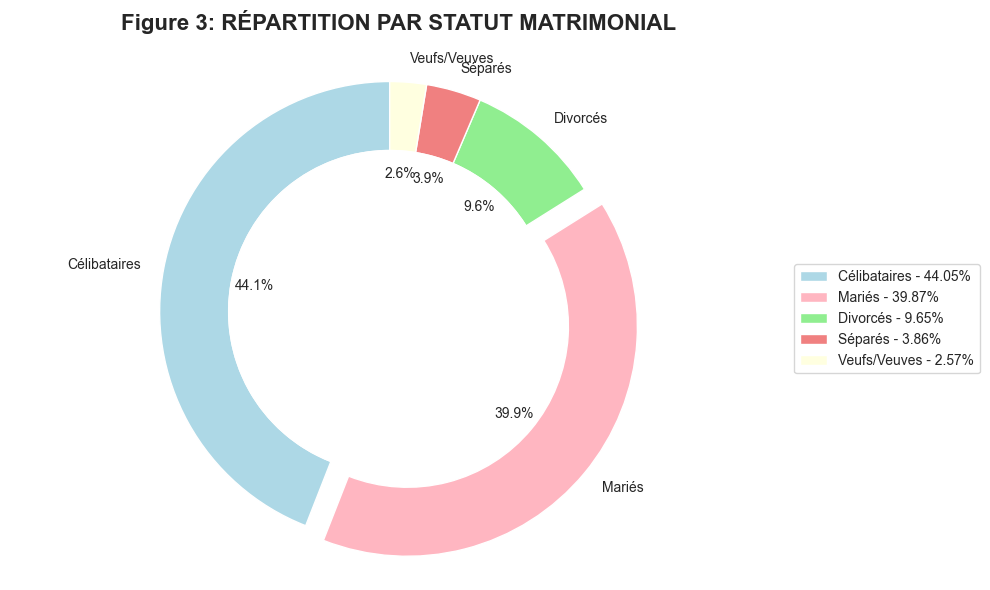

In [ ]:
plt.figure(figsize=(10, 6))
labels = ['Célibataires', 'Mariés', 'Divorcés', 'Séparés', 'Veufs/Veuves']
sizes = [Single_count, Married_count, Divorced_count, Separated_count,  widowed_count]
colors = ['lightblue', 'lightpink', 'lightgreen', 'lightcoral', 'lightyellow']
explode = (0, 0.1, 0, 0, 0)

wedges, texts, autotexts = plt.pie(sizes, explode=explode, labels=labels, colors=colors, 
                                  autopct='%1.1f%%', startangle=90, 
                                  wedgeprops=dict(width=0.3, edgecolor='w'))

legend_labels = [f"{label} - {size/sum(sizes)*100:.2f}%" for label, size in zip(labels, sizes)]
plt.legend(wedges, legend_labels, title="", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.gca().add_artist(plt.Circle((0, 0), 0.70, fc='white'))
plt.axis('equal')
plt.title('Figure 3: RÉPARTITION PAR STATUT MATRIMONIAL', fontsize=16, pad=20, fontweight='bold')
plt.tight_layout()
plt.show()

**4 :  Analyse des Performances des Employés**

*4-1: Calcule - Analyse des Performances des Employés*

In [ ]:
# Calcul des effectifs par niveau de performance & %
FullyMeets_count = df[df['PerformanceScore'] == 'Fully Meets']['EmployeeID'].count()
Percent_FullyMeets = (FullyMeets_count/head_count)*100 if head_count > 0 else 0
Exceeds_count = df[df['PerformanceScore'] == 'Exceeds']['EmployeeID'].count()
Percent_Exceeds = (Exceeds_count/head_count)*100 if head_count > 0 else 0
NeedsImprovement_count =df[df['PerformanceScore'] == 'Needs Improvement']['EmployeeID'].count()
Percent_NeedsImprovement = (NeedsImprovement_count/head_count)*100 if head_count > 0 else 0
PIP_count = df[df['PerformanceScore'] == 'PIP']['EmployeeID'].count()
Percent_PIP = (PIP_count/head_count)*100 if head_count > 0 else 0

# Affichage des résultats
print("===========================")
print("Tableau 3 : Répartition par performance")
print("--------------------------------")
print(f"Niveau attendu: {FullyMeets_count} employees ({Percent_FullyMeets:.2f}%)")
print(f"Performance excellente: {Exceeds_count} employees ({Percent_Exceeds:.2f}%)")
print(f"À améliorer: {NeedsImprovement_count} employees ({Percent_NeedsImprovement:.2f}%)")
print(f"Plan d'amélioration: {PIP_count} employees ({Percent_PIP:.2f}%)")
print("===========================")

Tableau 3 : Répartition par performance
--------------------------------
Niveau attendu: 243 employees (78.14%)
Performance excellente: 37 employees (11.90%)
À améliorer: 18 employees (5.79%)
Plan d'amélioration: 13 employees (4.18%)


**Analyse :**
*La performance globale des employés est satisfaisante avec 78,14% classés "attendus". Toutefois, il est important de mettre en place des actions de suivi pour les 10% d'employés nécessitant des améliorations, afin d'optimiser la productivité*

*4-2: Représentation Graphique - Analyse des Performances des Employés*

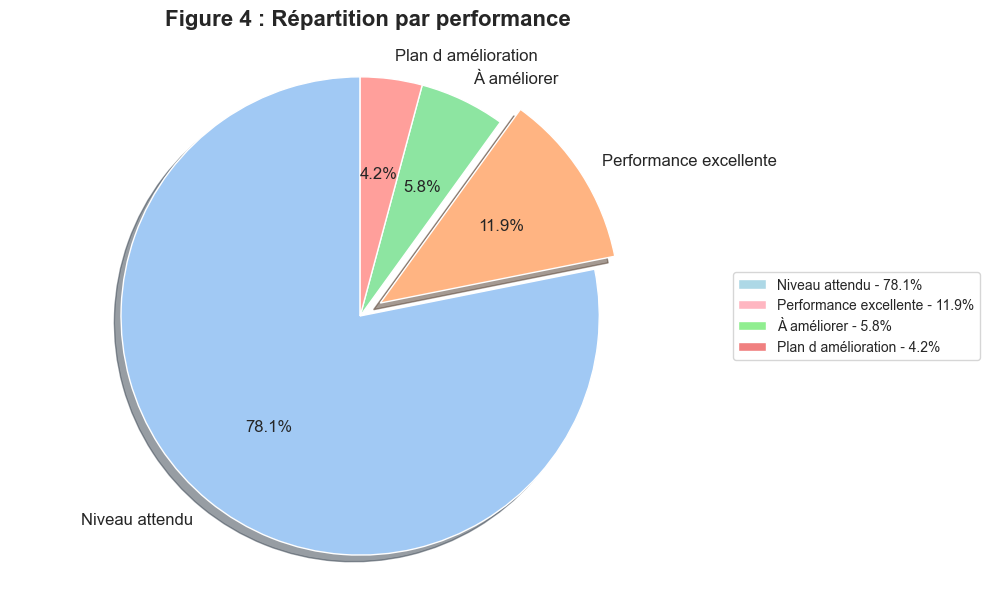

In [ ]:
plt.figure(figsize=(10, 6))
labels = ['Niveau attendu', 'Performance excellente', 'À améliorer', 'Plan d amélioration']
sizes = [FullyMeets_count, Exceeds_count, NeedsImprovement_count, PIP_count]
colors = sns.color_palette("pastel")
explode = (0, 0.1, 0, 0)

legend_labels = [f"{label} - {size/sum(sizes)*100:.1f}%" for label, size in zip(labels, sizes)]
plt.legend(wedges, legend_labels, title="", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        startangle=90, shadow=True, textprops={'fontsize': 12})
plt.axis('equal')
plt.title('Figure 4 : Répartition par performance', fontsize=16, pad=20, fontweight='bold')
plt.tight_layout()
plt.show()

**5 : Analyse des Employés par Département**

*5-1 : Calcule - Analyse des Employés par Département*

In [ ]:
# Calcul des effectifs par département
Production_count = df[df['Department'] == 'Production       ']['EmployeeID'].count()
AdminOffices_count = df[df['Department'] == 'Admin Offices']['EmployeeID'].count()
Engineering_count = df[df['Department'] == 'Engineering']['EmployeeID'].count()
ExecutiveOffice_Count = df[df['Department'] == 'Executive Office']['EmployeeID'].count()
ITIS_count = df[df['Department'] == 'IT/IS']['EmployeeID'].count()
Sales_Count = df[df['Department'] == 'Sales']['EmployeeID'].count()
Production_Percent = (Production_count/head_count)*100 if head_count > 0 else 0
AdminOffices_Percent = (AdminOffices_count/head_count)*100 if head_count > 0 else 0
Engineering_Percent = (Engineering_count/head_count)*100 if head_count > 0 else 0
ExecutiveOffice_Percent = (ExecutiveOffice_Count/head_count)*100 if head_count > 0 else 0
ITIS_Percent = (ITIS_count/head_count)*100 if head_count > 0 else 0
Sales_Percent = (Sales_Count/head_count)*100 if head_count > 0 else 0
# Affichage des résultats
print("===========================")
print("Tableau 4 : Répartition par Département:")
print("--------------------------------")
print(f"Production: {Production_count} employees ({Production_Percent:.2f}%)")
print(f"Administration: {AdminOffices_count} employees ({AdminOffices_Percent:.2f}%)")
print(f"Ingénieries: {Engineering_count} employees ({Engineering_Percent:.2f}%)")
print(f"Direction: {ExecutiveOffice_Count} employees ({ExecutiveOffice_Percent:.2f}%)")
print(f"IT/IS: {ITIS_count} employees ({ITIS_Percent:.2f}%)")
print(f"Commercial: {Sales_Count} employees ({Sales_Percent:.2f}%)")
print("===========================")

Tableau 4 : Répartition par Département:
--------------------------------
Production: 209 employees (67.20%)
Administration: 9 employees (2.89%)
Ingénieries: 11 employees (3.54%)
Direction: 1 employees (0.32%)
IT/IS: 50 employees (16.08%)
Commercial: 31 employees (9.97%)


**Analyse :**
*La majorité des employés se trouvent dans le département Production (67,20%), ce qui est typique pour une entreprise axée sur la production. Les autres départements, comme l'administration et la direction, sont de plus petite taille, ce qui peut refléter la structure hiérarchique de l'organisation*

*5-2 : Représentation Graphique - Analyse des Employés par Département*

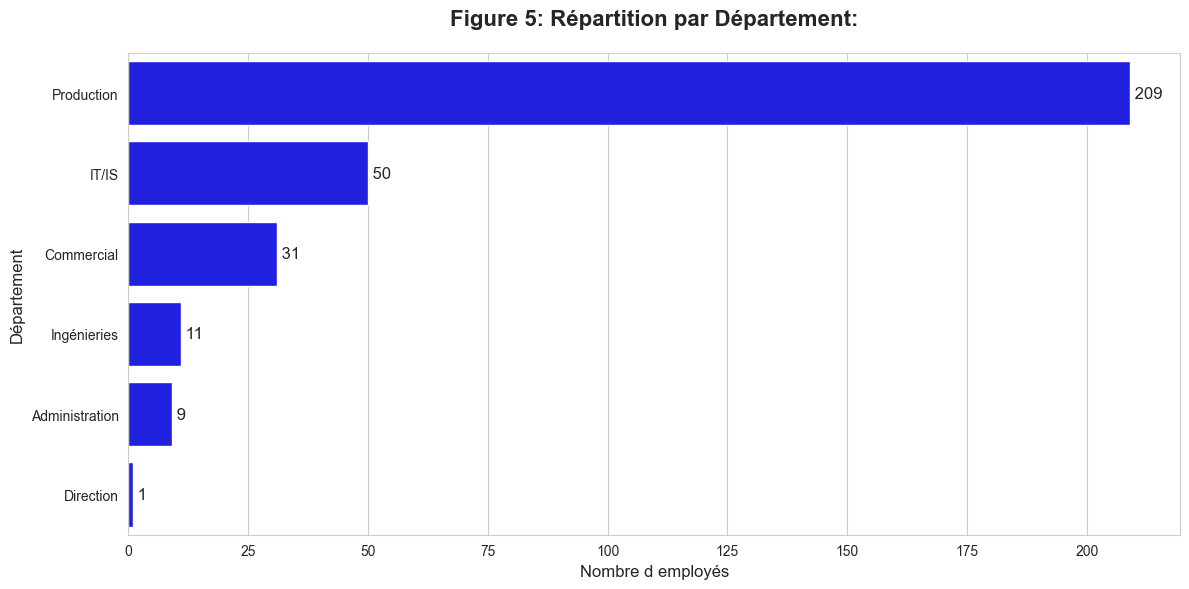

In [ ]:
plt.figure(figsize=(12, 6))
departments = ['Production', 'IT/IS', 'Commercial', 'Ingénieries', 'Administration', 'Direction']
counts = [Production_count, ITIS_count, Sales_Count, Engineering_count, AdminOffices_count, ExecutiveOffice_Count]

ax = sns.barplot(x=counts, y=departments, color="blue")
ax.set_xlabel('Nombre d employés', fontsize=12)
ax.set_ylabel('Département', fontsize=12)
ax.set_title('Figure 5: Répartition par Département:', fontsize=16, pad=20, fontweight='bold')

for i, count in enumerate(counts):
    ax.text(count, i, f' {count}', va='center', fontsize=12)

plt.tight_layout()
plt.show()

**8: Analyse de la Satisfaction des employés**

*8-1: Calcule - Satisfaction des employés*

*A-Créer la colonne 'Satisfaction Status'*

In [ ]:
# Créer la colonne 'Satisfaction Status' en utilisant une fonction lambda
df['Satisfaction Status'] = df['EmployeeSatisfaction'].apply(lambda x: 
    'Very Low' if x == 1 else 
    'Low' if x == 2 else 
    'Acceptable' if x == 3 else 
    'High' if x == 4 else 
    'Very High' if x == 5 else 
    'Unknown'
)

# Afficher les premières lignes pour vérifier
print("===========================")
print("Tableau 5: Satisfaction des employés (extrait)")
print("---------------------------")
print(df[['EmployeeSatisfaction', 'Satisfaction Status']].head())
print("===========================")


Tableau 5: Satisfaction des employés (extrait)
---------------------------
   EmployeeSatisfaction Satisfaction Status
0                     5           Very High
1                     3          Acceptable
2                     3          Acceptable
3                     5           Very High
4                     4                High


In [ ]:
# Calcul des effectifs par leur Satisfaction & %
VeryLow_count = df[df['Satisfaction Status'] == 'Very Low']['EmployeeID'].count()
Percent_VeryLow = (VeryLow_count/head_count)*100 if head_count > 0 else 0
Low_count = df[df['Satisfaction Status'] == 'Low']['EmployeeID'].count()
Percent_Low = (Low_count/head_count)*100 if head_count > 0 else 0
Acceptable_count = df[df['Satisfaction Status'] == 'Acceptable']['EmployeeID'].count()
Percent_Acceptable = (Acceptable_count/head_count)*100 if head_count > 0 else 0
High_count = df[df['Satisfaction Status'] == 'High']['EmployeeID'].count()
Percent_High = (High_count/head_count)*100 if head_count > 0 else 0
VeryHigh_count = df[df['Satisfaction Status'] == 'Very High']['EmployeeID'].count()
Percent_VeryHigh = (VeryHigh_count/head_count)*100 if head_count > 0 else 0

# Affichage des résultats
print("===========================")
print("Tableau 6: Répartition des Employés en Fonction de leur Satisfaction")
print("--------------------------------")
print(f"Très Faible: {VeryLow_count} employees ({Percent_VeryLow:.2f}%)")
print(f"Faible: {Low_count} employees ({Percent_Low:.2f}%)")
print(f"Acceptable: {Acceptable_count} employees ({Percent_Acceptable:.2f}%)")
print(f"Élevé: {High_count} employees ({Percent_High:.2f}%)")
print(f"Très élevé: {VeryHigh_count} employees ({Percent_VeryHigh:.2f}%)")
print("===========================")

Tableau 6: Répartition des Employés en Fonction de leur Satisfaction
--------------------------------
Très Faible: 2 employees (0.64%)
Faible: 9 employees (2.89%)
Acceptable: 108 employees (34.73%)
Élevé: 94 employees (30.23%)
Très élevé: 98 employees (31.51%)


**Analyse :**
*La grande majorité des employés exprime un niveau de satisfaction allant de "acceptable" à "très élevé" (96,47%). Cependant, une petite portion d'employés se déclarant faiblement satisfaits nécessite une attention particulière afin d'améliorer le bien-être global.*

*8-2: Représentation Graphique - Satisfaction des employés*

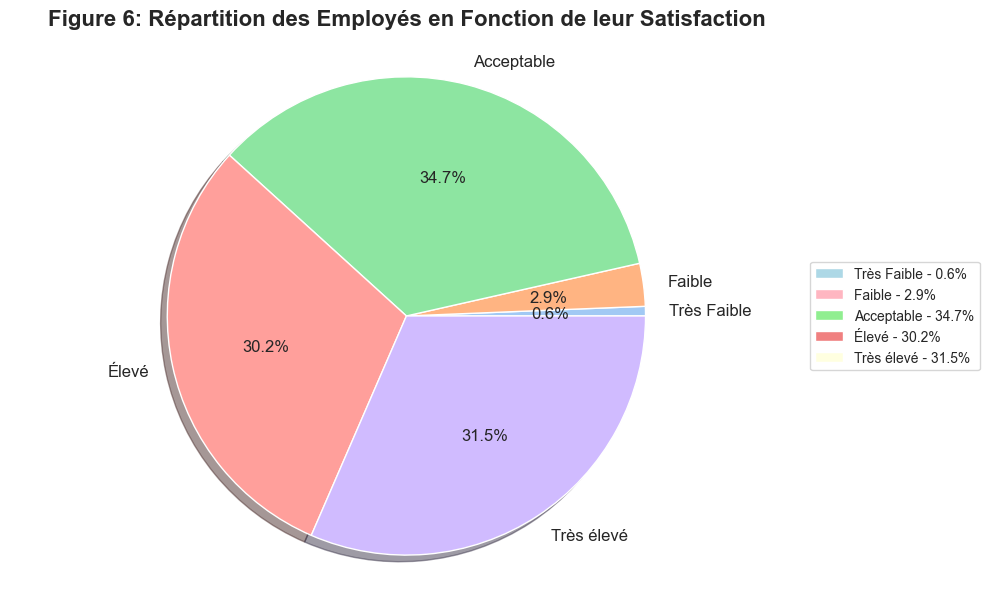

In [ ]:
plt.figure(figsize=(10, 6))
labels = ['Très Faible', 'Faible', 'Acceptable', 'Élevé','Très élevé']
sizes = [VeryLow_count, Low_count, Acceptable_count, High_count, VeryHigh_count]
colors = sns.color_palette("pastel", n_colors=5)
explode = (0, 0, 0, 0, 0)
# Créer une légende avec les couleurs et les pourcentages
legend_labels = [f"{label} - {size/sum(sizes)*100:.1f}%" for label, size in zip(labels, sizes)]
plt.legend(wedges, legend_labels, title="", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))


plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        startangle=0, shadow=True, textprops={'fontsize': 12})
plt.axis('equal')
plt.title('Figure 6: Répartition des Employés en Fonction de leur Satisfaction', fontsize=16, pad=20, fontweight='bold')
plt.tight_layout()
plt.show()

**6 - Analyse des Sources de Recrutement**

*6-1 : Calcule - Analyse des Sources de Recrutement*

In [ ]:
# Calcul des effectifs par source de Recrutement
LinkedIn_Count = df[df['RecruitmentSource'] == 'LinkedIn']['EmployeeID'].count()
CareerBuilder_Count = df[df['RecruitmentSource'] == 'CareerBuilder']['EmployeeID'].count()
DiversityJobFair_Count = df[df['RecruitmentSource'] == 'Diversity Job Fair']['EmployeeID'].count()
EmployeeReferral_Count = df[df['RecruitmentSource'] == 'Employee Referral']['EmployeeID'].count()
GoogleSearch_Count = Indeed_Count = df[df['RecruitmentSource'] == 'Google Search']['EmployeeID'].count()
OLWApplication_Count = df[df['RecruitmentSource'] == 'On-line Web application']['EmployeeID'].count()
Other_Count = df[df['RecruitmentSource'] == 'Other']['EmployeeID'].count()
Website_Count = df[df['RecruitmentSource'] == 'Website']['EmployeeID'].count()
Indeed_Count = df[df['RecruitmentSource'] == 'Indeed']['EmployeeID'].count()
Percent_Linkedin = (LinkedIn_Count/head_count)*100 if head_count > 0 else 0
Percent_CareerBuilder = (CareerBuilder_Count/head_count)*100 if head_count > 0 else 0
Percent_DJF = (DiversityJobFair_Count/head_count)*100 if head_count > 0 else 0
Percent_EmployeeReferral = (EmployeeReferral_Count/head_count)*100 if head_count > 0 else 0
Percent_GoogleSearch = (GoogleSearch_Count/head_count)*100 if head_count > 0 else 0
Percent_OLWApplication = (OLWApplication_Count/head_count)*100 if head_count > 0 else 0
Percent_Other = (Other_Count/head_count)*100 if head_count > 0 else 0
Percent_Website = (Website_Count/head_count)*100 if head_count > 0 else 0
Percent_Indeed = (Indeed_Count/head_count)*100 if head_count > 0 else 0
# Affichage des résultats
print("===========================")
print("Tableau 7: Répartition par Source de recrutement:")
print("--------------------------------")
print(f"Indeed: {Indeed_Count} employés({Percent_Indeed:.2f}%)")
print(f"LinkedIn: {LinkedIn_Count} employés({Percent_Linkedin:.2f}%)")
print(f"Recherche Google: {GoogleSearch_Count} employés({Percent_GoogleSearch:.2f}%)")
print(f"Recommandation d'employés: {EmployeeReferral_Count} employés({Percent_EmployeeReferral:.2f}%)")
print(f"Foire à l'emploi: {DiversityJobFair_Count} employés({Percent_DJF:.2f}%)")
print(f"Création de carrière: {CareerBuilder_Count} employés({Percent_CareerBuilder:.2f}%)")
print(f"Site web: {Website_Count} employés({Percent_Website:.2f}%)")
print(f"Autre: {Other_Count} employés({Percent_Other:.2f}%)")
print(f"Candidature en ligne: {OLWApplication_Count} employés({Percent_OLWApplication:.2f}%)")
print("===========================")

Tableau 7: Répartition par Source de recrutement:
--------------------------------
Indeed: 87 employés(27.97%)
LinkedIn: 76 employés(24.44%)
Recherche Google: 49 employés(15.76%)
Recommandation d'employés: 31 employés(9.97%)
Foire à l'emploi: 29 employés(9.32%)
Création de carrière: 23 employés(7.40%)
Site web: 13 employés(4.18%)
Autre: 2 employés(0.64%)
Candidature en ligne: 1 employés(0.32%)


**Analyse :**
*Les plateformes en ligne telles qu’Indeed (27,97%) et LinkedIn (24,44%) représentent les principales sources de recrutement. Cela souligne l'importance de ces canaux pour attirer les talents, tout en suggérant un potentiel à exploiter pour les recommandations internes.*

*6-2 : Représentation Graphique - Analyse des Sources de Recrutement*

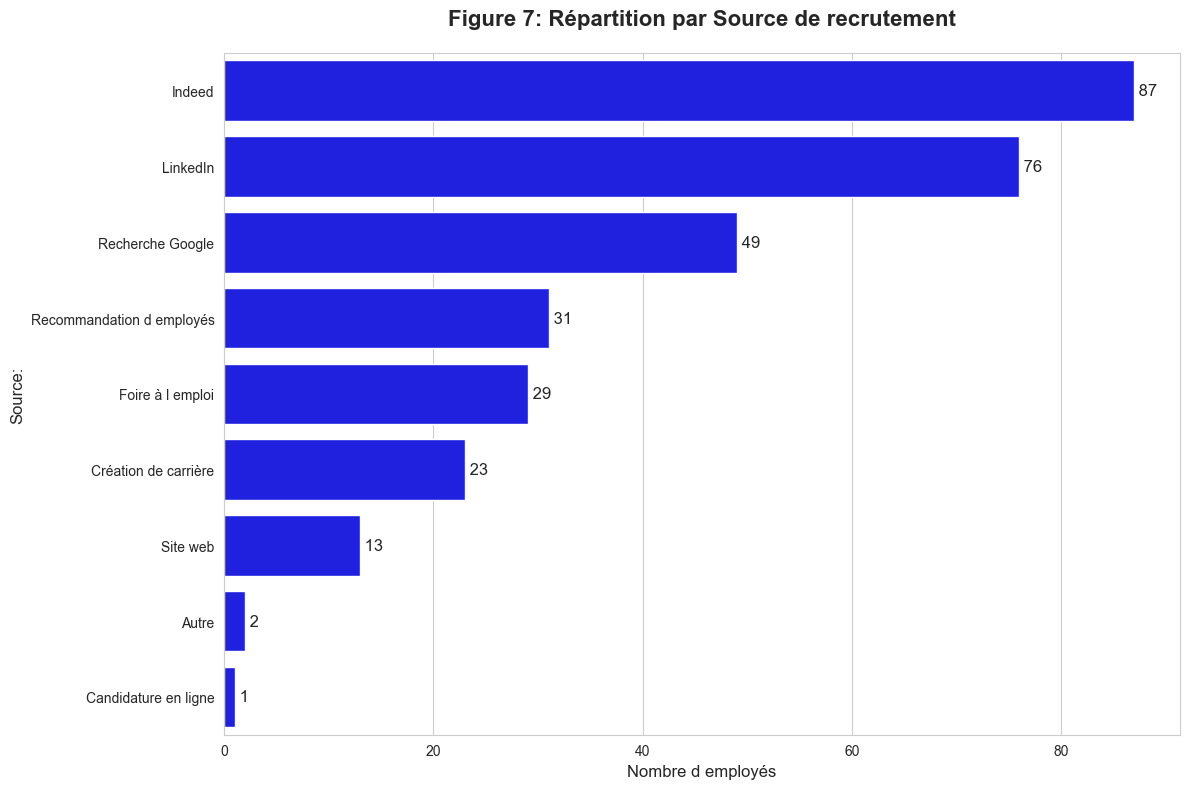

In [ ]:
plt.figure(figsize=(12, 8))
recruitment_sources = ['Indeed', 'LinkedIn', 'Recherche Google', 'Recommandation d employés', 
                      'Foire à l emploi', 'Création de carrière', 'Site web', 'Autre','Candidature en ligne']
counts = [Indeed_Count, LinkedIn_Count, GoogleSearch_Count, EmployeeReferral_Count,
          DiversityJobFair_Count, CareerBuilder_Count, Website_Count, Other_Count, OLWApplication_Count]

ax = sns.barplot(x=counts, y=recruitment_sources, color="blue")
ax.set_xlabel('Nombre d employés', fontsize=12)
ax.set_ylabel('Source:', fontsize=12)
ax.set_title('Figure 7: Répartition par Source de recrutement', fontsize=16, pad=20, fontweight='bold')

for i, count in enumerate(counts):
    ax.text(count, i, f' {count}', va='center', fontsize=12)

plt.tight_layout()
plt.show()

**7: Analyse des Salaires par Département**

*7-1: Calcule - Analyse des Salaires par Département*

In [ ]:
# Calcul des masses salariales par département
production_salary = df[df['Department'] == 'Production       ']['Salary'].sum()
admin_salary = df[df['Department'] == 'Admin Offices']['Salary'].sum()
engineering_salary = df[df['Department'] == 'Engineering']['Salary'].sum()
executive_salary = df[df['Department'] == 'Executive Office']['Salary'].sum()
it_salary = df[df['Department'] == 'IT/IS']['Salary'].sum()
sales_salary = df[df['Department'] == 'Sales']['Salary'].sum()
total_salary = df['Salary'].sum()
Percent_ProductionSal = (production_salary/total_salary)*100 if total_salary > 0 else 0
Percent_AdminSal = (admin_salary/total_salary)*100 if total_salary > 0 else 0
Percent_EngineeringSAL = (engineering_salary/total_salary)*100 if total_salary > 0 else 0
Percent_ExecutiveSal = (executive_salary/total_salary)*100 if total_salary > 0 else 0
Percent_ITSal = (it_salary/total_salary)*100 if total_salary > 0 else 0
Percent_SalesSal = (sales_salary/total_salary)*100 if total_salary > 0 else 0

# Affichage des résultats
print("===========================")
print("Tableau 8: Rapport de Salaires par Département")
print("---------------------------")
print(f"1. Production: {production_salary:,.2f} $({Percent_ProductionSal:.2f})%")
print(f"2. Administration: {admin_salary:,.2f} $({Percent_AdminSal:.2f})%")
print(f"3. Ingénieries: {engineering_salary:,.2f} $({Percent_EngineeringSAL:.2f})%")
print(f"4. Direction: {executive_salary:,.2f} $({Percent_ExecutiveSal:.2f})%")
print(f"5. IT/IS: {it_salary:,.2f} $({Percent_ITSal:.2f})%")
print(f"6. Commercial: {sales_salary:,.2f} $({Percent_SalesSal:.2f})%")
print("---------------------------")
print(f"SALAIRE TOTAL: {total_salary:,.2f} $")
print("===========================")

Tableau 8: Rapport de Salaires par Département
---------------------------
1. Production: 12,530,291.00 $(58.37)%
2. Administration: 646,127.00 $(3.01)%
3. Ingénieries: 1,044,884.00 $(4.87)%
4. Direction: 250,000.00 $(1.16)%
5. IT/IS: 4,853,232.00 $(22.61)%
6. Commercial: 2,140,899.00 $(9.97)%
---------------------------
SALAIRE TOTAL: 21,465,433.00 $


**Analyse :**
*Le département Production absorbe la plus grande part des salaires (58,37%), suivi par IT/IS (22,61%). Cette répartition reflète probablement la taille de chaque département et l'importance de leurs contributions dans l'organisation. Une analyse plus fine pourrait identifier des opportunités d'optimisation des coûts*

*7-2: Représentation Graphique - Analyse des Salaires par Département*

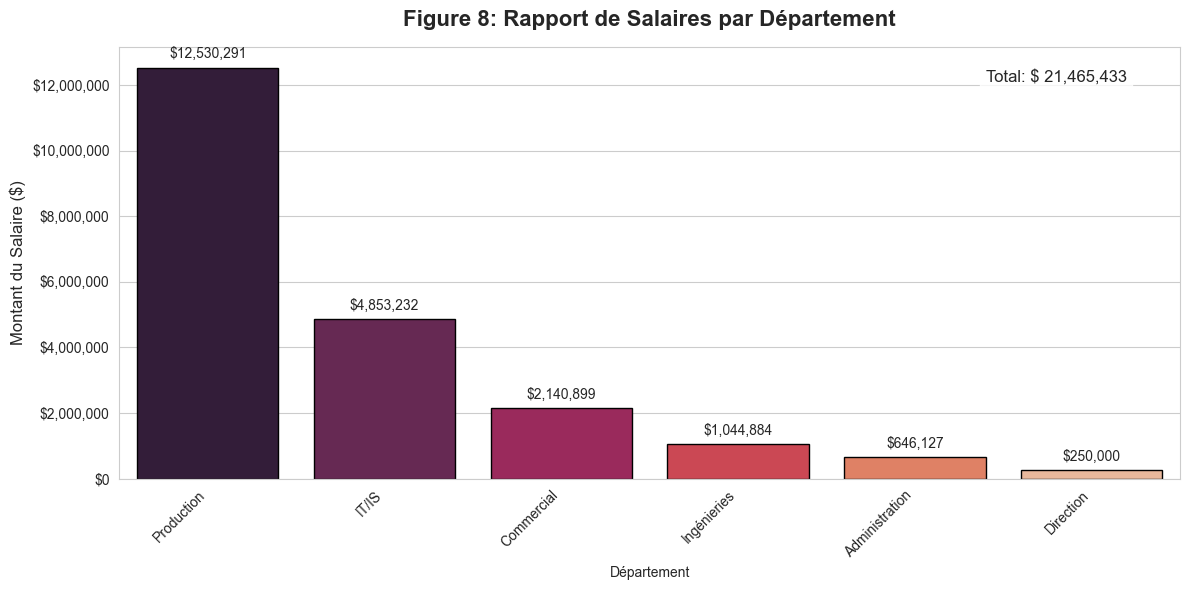

In [ ]:
plt.figure(figsize=(12, 6))
salary_data = pd.DataFrame({
    'Department': ['Production', 'Administration', 'Ingénieries', 
                   'Direction', 'IT/IS', 'Commercial'],
    'Salary': [production_salary, admin_salary, engineering_salary,
               executive_salary, it_salary, sales_salary]
}).sort_values('Salary', ascending=False)

ax = sns.barplot(x='Department', y='Salary', data=salary_data, 
                hue='Department', palette="rocket", dodge=False,
                edgecolor='black', legend=False)
ax.set_title('Figure 8: Rapport de Salaires par Département', fontsize=16, pad=15, fontweight='bold')
ax.set_xlabel('Département')
ax.set_ylabel('Montant du Salaire ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
ax.yaxis.set_major_formatter('${x:,.0f}')

for p in ax.patches:
    ax.annotate(f'${p.get_height():,.0f}', 
               (p.get_x() + p.get_width()/2., p.get_height()),
               ha='center', va='center', 
               xytext=(0, 10), 
               textcoords='offset points',
               fontsize=10)

plt.text(0.95, 0.95, f'Total: $ {total_salary:,.0f}',
        transform=ax.transAxes,
        ha='right', va='top',
        fontsize=12,
        bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

**8: Analyse des Employés par État**

*8-1: Calcule - Analyse des Employés par État*

In [ ]:
#1. Comptage des employés par état
state_counts = df['State'].value_counts().reset_index()
# Renommer les colonnes
state_counts.columns = ['State', 'EmployeeCount'] 
# Affichage des premiers états
print("===========================")
print("Tableau 9: Échantillon de la Répartition des Employés par État (extrait)")
print("---------------------------")
print(state_counts.head())
print("===========================")

Tableau 9: Échantillon de la Répartition des Employés par État (extrait)
---------------------------
  State  EmployeeCount
0    MA            276
1    CT              6
2    TX              3
3    VT              2
4    UT              1


In [ ]:
# 1. Chargement des contours géographiques
url = "https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json"
us_states = gpd.read_file(url)

# 2. Mapping code -> nom complet
state_code_map = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas',
    'CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut',
    'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia',
    'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois',
    'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas',
    'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine',
    'MD': 'Maryland', 'MA': 'Massachusetts', 'MI': 'Michigan',
    'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri',
    'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada',
    'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico',
    'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota',
    'OH': 'Ohio', 'OK': 'Oklahoma', 'OR': 'Oregon',
    'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina',
    'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas',
    'UT': 'Utah', 'VT': 'Vermont', 'VA': 'Virginia',
    'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin',
    'WY': 'Wyoming'
}

# 4. Fusion des données géographiques avec les données de comptage

# Ajout du code d'état basé sur le nom
us_states['code'] = us_states['name'].map({v: k for k, v in state_code_map.items()})
merged_data = us_states.merge(state_counts, left_on='code', right_on='State', how='left')

 # Reprojection en EPSG:3857 (système projeté)
merged_data = merged_data.to_crs(epsg=3857) 
# Remplacement des NaN par 0
merged_data['EmployeeCount'] = merged_data['EmployeeCount'].fillna(0)

# 5. Création d'une échelle de couleurs personnalisée
custom_scale = [
    [0.0, 'White'],
    [0.05, 'Blue'],
    [1.0, 'Black']
]

# 6. Calcul du point médian pour la légende
max_value = state_counts['EmployeeCount'].max()
midpoint = max_value / 2

# 7. Création de la carte
fig = px.choropleth(
    merged_data,
    geojson=us_states.geometry.__geo_interface__,  # Conversion GeoDataFrame en GeoJSON
    locations=merged_data.index,
    color='EmployeeCount',
    color_continuous_scale=custom_scale,
    range_color=[0, max_value],
    scope='usa',
    labels={'EmployeeCount': 'Nombre d\'employés'},
    title='Figure 9:Répartition des Employés par État',
)

# 8. Personnalisation de la légende
fig.update_layout(
    coloraxis_colorbar={
        'title': 'Employés',
        'tickvals': [0, midpoint, max_value],
        'ticktext': [f'0', f'{int(midpoint)}', f'{max_value}']
    }
)

# 9. Ajout des annotations (vérification du centroïde)
merged_data['centroid'] = merged_data['geometry'].centroid
for idx, row in merged_data.iterrows():
    if row['EmployeeCount'] > 0 and row['centroid'] is not None:
        fig.add_annotation(
            x=row['centroid'].x,
            y=row['centroid'].y,
            text=f"{row['code']}: {int(row['EmployeeCount'])}",
            showarrow=False,
            font=dict(size=10, color='black')
        )
        
fig.write_html('Figure 9:Répartition des Employés par État.html')

# 10. Affichage de la carte
fig.show()

**Analyse :**
*La quasi-totalité des employés (276) est localisée dans l'État du Massachusetts "MA", suggérant une forte concentration géographique, possiblement au siège ou dans une région stratégique de l'entreprise. Les autres États sont représentés de manière marginale.*

## **Conclusion**

*Ce rapport offre une vue d'ensemble des tendances et indicateurs clés en ressources humaines sur une période de 12 ans. L'utilisation de Power BI et des fonctions DAX a permis d'extraire des insights stratégiques concernant la répartition des effectifs, la performance, la satisfaction, la répartition géographique et les coûts salariaux*

## **Recommandations**
1. Optimisation de la performance : Mettre en place des plans d'amélioration pour les 
employés identifiés comme devant améliorer leur performance.
2. Amélioration de la satisfaction : Cibler les initiatives de bien-être pour les employés 
dans les catégories "faible" et "très faible" satisfaction.
3. Recrutement : Renforcer les stratégies de recrutement par les recommandations 
internes et diversifier les canaux en ligne.
4. Rétention des talents : Analyser les facteurs liés à l'ancienneté et aux départs pour 
améliorer la rétention des employés.


*Ce rapport structuré permet une compréhension approfondie des dynamiques RH et offre des pistes d'action pour optimiser la gestion des ressources humaines au sein de l'organisation.*

**Restez connectés**

- LinkedIn: [@abdelmoughit-assal](https://www.linkedin.com/in/abdelmoughit-assal/)
- Email : abdelmoughit.assal@yahoo.com
<div align="left"> 
  <a href = "mailto:abdelmoughit.assal@yahoo.com"><img src="https://img.shields.io/badge/Yahoo%20mail-6D4AFF?style=for-the-badge&logo=yahoomail&logoColor=white" target="_blank"></a>
  <a href="https://www.linkedin.com/in/abdelmoughit-assal" target="_blank"><img src="https://img.shields.io/badge/-LinkedIn-%230077B5?style=for-the-badge&logo=linkedin&logoColor=white" target="_blank"></a> 
</div>